# Addition

In this example, we will construct a network that adds two inputs.
The network utilizes two communication channels
into the same neural population.
Addition is thus somewhat 'free', since the incoming currents
from different synaptic connections interact linearly
(though two inputs don't have to
combine in this way; see the combining demo).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import nengo

## Step 1: Create the Model

The model has three ensembles, which we will call A, B, and C.

In [2]:
# Create the model object
model = nengo.Network(label='Addition')
with model:
    # Create 3 ensembles each containing 100 leaky integrate-and-fire neurons
    A = nengo.Ensemble(100, dimensions=1)
    B = nengo.Ensemble(100, dimensions=1)
    C = nengo.Ensemble(100, dimensions=1)

## Step 2: Provide Input to the Model

We will use two constant scalar values for the two input signals
that drive activity in ensembles A and B.

In [3]:
with model:
    # Create input nodes representing constant values
    input_a = nengo.Node(output=0.5)
    input_b = nengo.Node(output=0.3)

    # Connect the input nodes to the appropriate ensembles
    nengo.Connection(input_a, A)
    nengo.Connection(input_b, B)

    # Connect input ensembles A and B to output ensemble C
    nengo.Connection(A, C)
    nengo.Connection(B, C)

## Step 3: Probe Output

Let's collect output data from each ensemble and output.

In [4]:
with model:
    input_a_probe = nengo.Probe(input_a)
    input_b_probe = nengo.Probe(input_b)
    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)
    C_probe = nengo.Probe(C, synapse=0.01)

## Step 4: Run the Model

In order to run the model, we have to create a simulator.
Then, we can run that simulator over and over again
without affecting the original model.

In [5]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

The data produced by running the model can now be plotted.

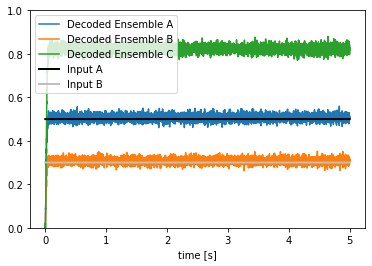

In [6]:
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(
    sim.trange(),
    sim.data[A_probe],
    label="Decoded Ensemble A")
plt.plot(
    sim.trange(),
    sim.data[B_probe],
    label="Decoded Ensemble B")
plt.plot(
    sim.trange(),
    sim.data[C_probe],
    label="Decoded Ensemble C")
plt.plot(
    sim.trange(),
    sim.data[input_a_probe],
    label="Input A",
    color='k',
    linewidth=2.0)
plt.plot(
    sim.trange(),
    sim.data[input_b_probe],
    label="Input B",
    color='0.75',
    linewidth=2.0)
plt.legend()
plt.ylim(0, 1)
plt.xlabel('time [s]');

You can check that the decoded value
of the activity in ensemble C
provides a good estimate of the sum of inputs A and B.